# Observed trends
### 1. From 20 degree to both poles, temperature is decreasing.
### 2. Cities near equator normally have high humidity and some cities around -20 and 40 degree have very low    humidity.
### 3. No obvious relationship between latitude and wind speed or cloudiness.

In [ ]:
import json
import requests
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from citipy import citipy
from random import random
from random import randint
from config import api_key_weather

In [2]:
# Randomly choose 1000 cities
cities = []

while len(cities) < 1000:
    
    # Devide the globe into 5 zones by latitude and get lat and lon randomly from these 5 zones
    n = randint(0, 4)
    lat = randint(-60+27*n, -33+27*n)
    lon = randint(-180, 180)
    city = citipy.nearest_city(lat, lon)
    city_name = city.city_name
    
    # Only add city that doesnt show before
    if city_name not in cities:
        cities.append(city_name)
        

In [3]:
len(cities)

1000

In [4]:
# Creat an empty dataframe with 1000 rows
city_list = pd.DataFrame({"number": np.arange(1000)+1,"city_name":"","lat":"","lon":"","temp":"","humidity":"","wind_speed":"","clouds":""})
city_list.head()

,number,city_name,lat,lon,temp,humidity,wind_speed,clouds
0,1,,,,,,,
1,2,,,,,,,
2,3,,,,,,,
3,4,,,,,,,
4,5,,,,,,,


In [5]:
# save the cities names to city_list
city_list["city_name"] = cities
city_list = city_list.set_index("city_name")
city_list.head()

,number,lat,lon,temp,humidity,wind_speed,clouds
city_name,,,,,,,
provideniya,1,,,,,,
lebu,2,,,,,,
azad shahr,3,,,,,,
busselton,4,,,,,,
hambantota,5,,,,,,


In [6]:
# Save url
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [7]:
# Set a variable to count the number of cities that of which weather cannot be found 
count = 0

# Loop through the rows of city_list to get weather data for each city
for index, row in city_list.iterrows():

    city = index
    query_url = f"{url}appid={api_key_weather}&q={city}&units={units}"
     
    try:
        response = requests.get(query_url)
        weather = response.json()
        
        # Get the data needed
        lat = weather["coord"]["lat"]
        lon = weather["coord"]["lon"]
        temperature = weather["main"]["temp"]
        humidity = weather["main"]["humidity"]
        wind_speed = weather["wind"]["speed"]
        clouds = weather["clouds"]["all"]
        
        # Save data to city_list
        city_list.loc[index, "lat"] = lat
        city_list.loc[index, "lon"] = lon
        city_list.loc[index, "temp"] = temperature
        city_list.loc[index, "humidity"] = humidity
        city_list.loc[index, "wind_speed"] = wind_speed
        city_list.loc[index, "clouds"] = clouds
        
        print(f"The data of city '{city}' is achieved.")
        
    except:
        # Print the city name if data cannot be found
        count += 1
        print("--------------------------------------------")
        print(f"{count}. There is a problem with city '{city}'.")
        print(weather)
        print("--------------------------------------------")
    
    

The data of city 'provideniya' is achieved.
The data of city 'lebu' is achieved.
--------------------------------------------
1. There is a problem with city 'azad shahr'.
{'cod': '404', 'message': 'city not found'}
--------------------------------------------
The data of city 'busselton' is achieved.
The data of city 'hambantota' is achieved.
The data of city 'north bend' is achieved.
The data of city 'rikitea' is achieved.
The data of city 'bilibino' is achieved.
The data of city 'severo-kurilsk' is achieved.
The data of city 'bogorodskoye' is achieved.
--------------------------------------------
2. There is a problem with city 'taolanaro'.
{'cod': '404', 'message': 'city not found'}
--------------------------------------------
The data of city 'bandarbeyla' is achieved.
The data of city 'plettenberg bay' is achieved.
The data of city 'iqaluit' is achieved.
The data of city 'tarija' is achieved.
The data of city 'mogadishu' is achieved.
The data of city 'nanortalik' is achieved.
---

The data of city 'klaksvik' is achieved.
--------------------------------------------
20. There is a problem with city 'ruatoria'.
{'cod': '404', 'message': 'city not found'}
--------------------------------------------
The data of city 'rutana' is achieved.
The data of city 'conceicao do araguaia' is achieved.
The data of city 'kiama' is achieved.
--------------------------------------------
21. There is a problem with city 'solovetskiy'.
{'cod': '404', 'message': 'city not found'}
--------------------------------------------
The data of city 'cremona' is achieved.
The data of city 'aykhal' is achieved.
The data of city 'mayumba' is achieved.
The data of city 'yellowknife' is achieved.
The data of city 'inuvik' is achieved.
--------------------------------------------
22. There is a problem with city 'sataua'.
{'cod': '404', 'message': 'city not found'}
--------------------------------------------
The data of city 'santa cruz' is achieved.
The data of city 'tsabong' is achieved.
The d

--------------------------------------------
37. There is a problem with city 'uwayl'.
{'cod': '404', 'message': 'city not found'}
--------------------------------------------
The data of city 'srednekolymsk' is achieved.
The data of city 'sioux lookout' is achieved.
The data of city 'port lincoln' is achieved.
The data of city 'chauk' is achieved.
The data of city 'mayo' is achieved.
The data of city 'rio gallegos' is achieved.
--------------------------------------------
38. There is a problem with city 'grand river south east'.
{'cod': '404', 'message': 'city not found'}
--------------------------------------------
The data of city 'xiaolingwei' is achieved.
The data of city 'wunsiedel' is achieved.
The data of city 'hobart' is achieved.
--------------------------------------------
39. There is a problem with city 'tsihombe'.
{'cod': '404', 'message': 'city not found'}
--------------------------------------------
The data of city 'bridlington' is achieved.
The data of city 'san carl

The data of city 'yeppoon' is achieved.
The data of city 'cururupu' is achieved.
The data of city 'coquimbo' is achieved.
The data of city 'hobyo' is achieved.
The data of city 'sao filipe' is achieved.
The data of city 'nantucket' is achieved.
The data of city 'sosua' is achieved.
The data of city 'meulaboh' is achieved.
--------------------------------------------
51. There is a problem with city 'nguiu'.
{'cod': '404', 'message': 'city not found'}
--------------------------------------------
The data of city 'shache' is achieved.
The data of city 'pedernales' is achieved.
The data of city 'tobane' is achieved.
The data of city 'umea' is achieved.
The data of city 'bambanglipuro' is achieved.
The data of city 'isagarh' is achieved.
The data of city 'terekli-mekteb' is achieved.
The data of city 'otaru' is achieved.
The data of city 'lulea' is achieved.
The data of city 'atasu' is achieved.
The data of city 'porbandar' is achieved.
The data of city 'svetlogorsk' is achieved.
The data 

The data of city 'half moon bay' is achieved.
The data of city 'zonguldak' is achieved.
The data of city 'little current' is achieved.
The data of city 'port blair' is achieved.
The data of city 'kingisepp' is achieved.
The data of city 'senneterre' is achieved.
The data of city 'tilichiki' is achieved.
The data of city 'kyabram' is achieved.
The data of city 'labytnangi' is achieved.
The data of city 'vredendal' is achieved.
The data of city 'kyshtovka' is achieved.
The data of city 'salto' is achieved.
The data of city 'marondera' is achieved.
The data of city 'alcaniz' is achieved.
The data of city 'ayan' is achieved.
The data of city 'quepos' is achieved.
The data of city 'kovylkino' is achieved.
The data of city 'yarkovo' is achieved.
The data of city 'sinnamary' is achieved.
The data of city 'beyneu' is achieved.
The data of city 'coihaique' is achieved.
The data of city 'san ignacio' is achieved.
The data of city 'hualmay' is achieved.
The data of city 'tautira' is achieved.
The

The data of city 'imeni poliny osipenko' is achieved.
The data of city 'pouso alegre' is achieved.
--------------------------------------------
72. There is a problem with city 'yuzhno-yeniseyskiy'.
{'cod': '404', 'message': 'city not found'}
--------------------------------------------
The data of city 'dvinskoy' is achieved.
The data of city 'san quintin' is achieved.
The data of city 'henties bay' is achieved.
The data of city 'ambilobe' is achieved.
The data of city 'edd' is achieved.
--------------------------------------------
73. There is a problem with city 'navabad'.
{'cod': '404', 'message': 'city not found'}
--------------------------------------------
The data of city 'cotonou' is achieved.
The data of city 'kamyzyak' is achieved.
The data of city 'tessalit' is achieved.
The data of city 'nouakchott' is achieved.
The data of city 'nago' is achieved.
The data of city 'orchard homes' is achieved.
The data of city 'goderich' is achieved.
The data of city 'watari' is achieved.


The data of city 'papillion' is achieved.
The data of city 'barcelona' is achieved.
The data of city 'baruun-urt' is achieved.
The data of city 'high level' is achieved.
The data of city 'mamallapuram' is achieved.
The data of city 'freilassing' is achieved.
The data of city 'sangmelima' is achieved.
The data of city 'kalmunai' is achieved.
The data of city 'killorglin' is achieved.
--------------------------------------------
91. There is a problem with city 'urdzhar'.
{'cod': '404', 'message': 'city not found'}
--------------------------------------------
The data of city 'oum hadjer' is achieved.
The data of city 'kariba' is achieved.
The data of city 'verkh-usugli' is achieved.
The data of city 'lensk' is achieved.
The data of city 'abu kamal' is achieved.
The data of city 'gravatai' is achieved.
The data of city 'chumikan' is achieved.
The data of city 'mangaratiba' is achieved.
The data of city 'anakapalle' is achieved.
--------------------------------------------
92. There is a 

In [8]:
city_list.head()

,number,lat,lon,temp,humidity,wind_speed,clouds
city_name,,,,,,,
provideniya,1,64.42,-173.23,15,62,10,0
lebu,2,8.96,38.73,12,81,3.6,40
azad shahr,3,,,,,,
busselton,4,-33.64,115.35,16.63,48,5.37,5
hambantota,5,6.12,81.12,29,79,3.6,20


In [9]:
# save the df to csv file
city_list.to_csv("data/city_list.csv", encoding = "utf-8", index = True, header = True)

In [10]:
# Convert data type to float
cols = ['lat', 'lon', 'temp','humidity','wind_speed','clouds']
city_list[cols] = city_list[cols].apply(pd.to_numeric, errors='coerce', axis=1)

In [11]:
city_list.dtypes

number          int32
lat           float64
lon           float64
temp          float64
humidity      float64
wind_speed    float64
clouds        float64
dtype: object

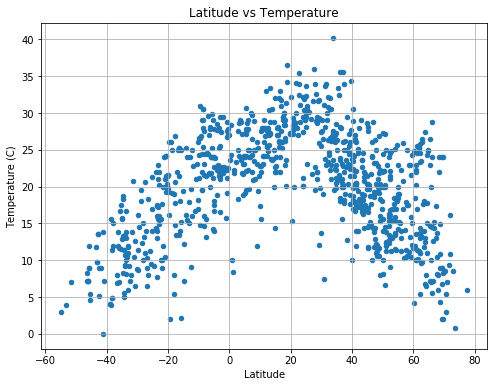

In [12]:
#Plot scatter chart to showcase the relationship between temperature and latitude
temp = city_list.plot(kind ="scatter",x = "lat", y="temp",grid=True, figsize=(8,6),
              title="Latitude vs Temperature")

plt.ylabel("Temperature (C)")
plt.xlabel("Latitude")

plt.savefig("Images/Temperature.png")

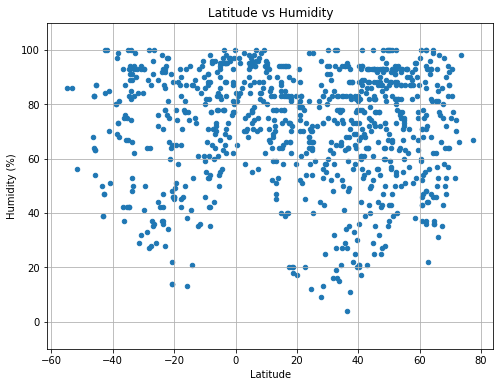

In [16]:
#Plot scatter chart to showcase the relationship between humidity and latitude
humidity = city_list.plot(kind ="scatter",x = "lat", y="humidity",grid=True, figsize=(8,6),
              title="Latitude vs Humidity")

plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.ylim(-10, 110)

plt.savefig("Images/Humidity.png")

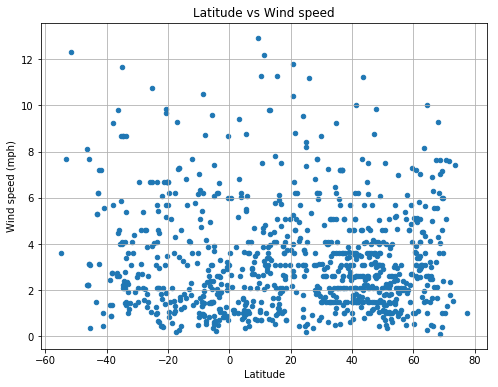

In [14]:
#Plot scatter chart to showcase the relationship between wind speed and latitude
wind = city_list.plot(kind ="scatter",x = "lat", y="wind_speed",grid=True, figsize=(8,6),
              title="Latitude vs Wind speed")

plt.ylabel("Wind speed (mph)")
plt.xlabel("Latitude")

plt.savefig("Images/WindSpeed.png")

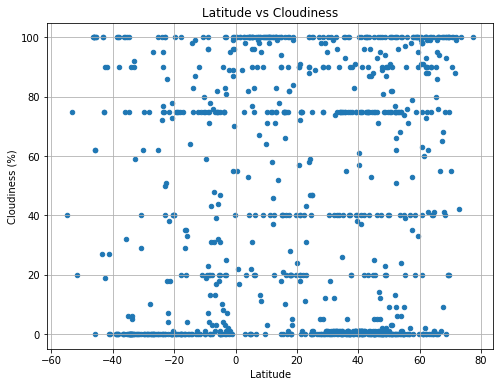

In [15]:
#Plot scatter chart to showcase the relationship between cloudiness and latitude
clouds = city_list.plot(kind ="scatter",x = "lat", y="clouds",grid=True, figsize=(8,6),
              title="Latitude vs Cloudiness")

plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")

plt.savefig("Images/Cloudiness.png")